<a href="https://colab.research.google.com/github/mamadoufoune6-spec/Data-sciencePortfolio/blob/main/MonteCarloParticleColliderSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

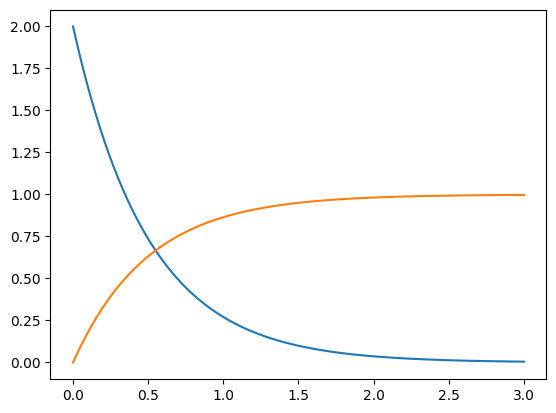

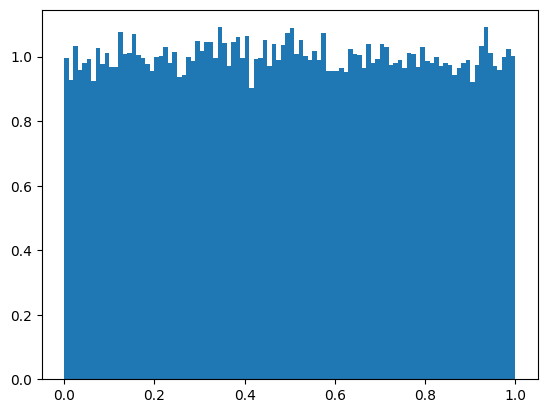

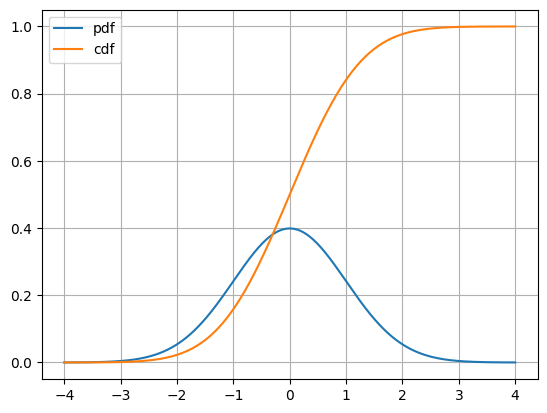

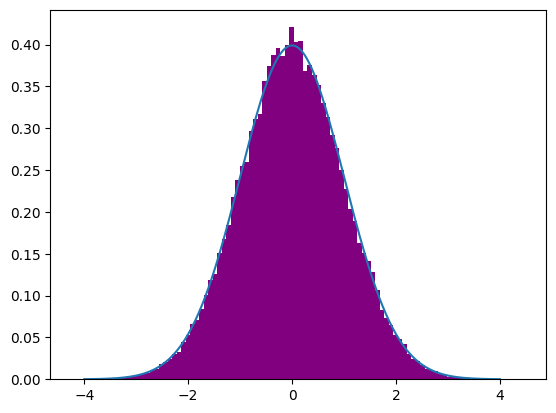

In [49]:
#Gaussian Distrubution,Plotting a histogram and calculating mean & variance
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp
import pandas as pd

#plt.style.use(['Science','Notebook'])
#Generate 100 numbers using gaussian distrubtion
#Normal distrubtion f(x)=(1/(std)(2pi)^1/2)*e^(0.5((x-m)/std)^2)
#Normal distrubtion F(x)=0.5[1+erf((x-m)/(std(2)^1/2))]
#Where m = mean and std = standard deviation
#Step 1 invert CDF Analytically : X ~ F(x) -> F^-1(U) ~ F(x), U is random uniform dist between 0 and 1

#lets do exp dist first
x = np.linspace(0,3,100)
f = 2*np.exp(-2*x)
F = 1-np.exp(-2*x)
plt.plot(x,f)
plt.plot(x,F)
plt.show()
#Using F[F^-1(x)] =x -> F^-1(x)= -(ln(1-x))lamda (p.s make sure to give valuse to your mean and std)
#Making random uniform dist
Us = np.random.rand(100000)
plt.hist(Us, bins=100, density=True)
plt.show()
#Normal dist
mu = 0
sigma = 1
#using scipy stats
from scipy.stats import norm
x = np.linspace(-4,4,500)
f = norm.pdf(x, mu, sigma)
F = norm.cdf(x, mu, sigma)
plt.plot(x,f, label="pdf")
plt.plot(x,F, label="cdf")
plt.legend()
plt.grid()
plt.show()
F_inv_Us = norm.ppf(Us, mu, sigma)
plt.hist(F_inv_Us,bins=100, density='norm', color='purple')
plt.plot(x, f)
plt.show()
#Using F[F^-1(x)] =x -> F^-1(x)= -(ln(1-x))lamda


In [74]:
#Event Generation
#"Toy" generator
#Particles - Decide particle(px, py, pz)
N_events = 1000
N_particles_per_event = 100
Particle_mass = 0.938 #Units = GeV/c^2
Normal_discrete_array = np.random.normal(0,1,N_events*N_particles_per_event*3)
reshaped_array = Normal_discrete_array.reshape((N_events, N_particles_per_event, 3))
print(reshaped_array)
#Loop event
for i in range(N_events):
    #Loop particles
    for j in range(N_particles_per_event):#inner loop over praticales
        px = reshaped_array[i,j,0]
        py = reshaped_array[i,j,1]
        pz = reshaped_array[i,j,2] # Generate px, py, pz here
#inside here, generate momentum
#Derived Quantities
pT = np.sqrt(px**2 + py**2) #transverse momentum
p_mag = np.sqrt(px**2 +py**2 +pz**2)#momentum magnitude
E = np.sqrt(px**2 +py**2 + pz**2 + Particle_mass**2)

print("pT: ", pT)
print("p_mag: ", p_mag)
print("E: ", E)

particle = {
    "event_id": i,
    "particle_id": j,
    "px": px,
    "py": py,
    "pz": pz,
    "pT": pT,
    "p_mag": p_mag,
    "E": E
}
print(particle)

#Fake event generator - practice
#Structured events storage
dtype = [('event_id', int), ('particle_id', int), ('px', float), ('py', float), ('pz', float), ('pT', float), ('p_mag', float), ('E', float)]

Structured_storage = np.zeros(N_events*N_particles_per_event, dtype=dtype)

for i in range(N_events):
    for j in range(N_particles_per_event):
        px = reshaped_array[i,j,0]
        py = reshaped_array[i,j,1]
        pz = reshaped_array[i,j,2]
        pT = np.sqrt(px**2 + py**2)
        p_mag = np.sqrt(px**2 +py**2 +pz**2)
        E = np
        index = i*N_particles_per_event + j
        Structured_storage[index]['event_id'] = i
        Structured_storage[index]['particle_id'] = j
        Structured_storage[index]['particle_id'] = 1
        Structured_storage[index]['px'] = px
        Structured_storage[index]['py'] = py
        Structured_storage[index]['pz'] = pz
        Structured_storage[index]['pT'] = pT
        Structured_storage[index]['p_mag'] = p_mag
        Structured_storage[index]['E'] = np.sqrt(px**2 +py**2 + pz**2 + Particle_mass**2)
        #index += 1
print(Structured_storage)

#Physics MC generator
#Comparison



[[[ 1.29353094 -0.4409216  -0.8929258 ]
  [-1.79267207 -1.17610229 -0.46631158]
  [-0.1490121  -0.21268713 -1.33614121]
  ...
  [-0.7380095  -2.25631719  0.9077784 ]
  [-0.80857991 -0.26737807  1.22217955]
  [ 0.53774129 -2.03668384 -0.62625042]]

 [[ 0.99379343  1.00383205  0.62421515]
  [-0.69024919 -0.68975606  0.74559179]
  [ 0.44896637 -0.3265108   0.38488867]
  ...
  [-1.01151661 -0.75132697  0.50658664]
  [-0.65385116 -1.30518088  0.25514938]
  [-0.50264793 -0.54442598  0.44478559]]

 [[-2.54737195  1.12568     0.81722185]
  [-1.91101355  0.32727306  0.2927626 ]
  [ 1.16220422 -0.70359009  0.5225539 ]
  ...
  [-1.0837406   0.94936353  0.27967437]
  [ 0.03715333  0.42541621  1.24592727]
  [ 1.2598098  -0.48257303 -0.07538829]]

 ...

 [[-0.00505142  0.5049212   0.64835449]
  [-0.5469284   0.1360043  -0.73340477]
  [ 0.34909046 -1.9773285  -0.4946819 ]
  ...
  [ 0.04522491 -2.72709495  1.22610402]
  [-0.17607244  1.26041499  0.72099377]
  [ 0.39259831  1.45136008  1.94825735]]

 [